# Exploratory Data Analysis - Speed Dating Experiment

### Business Context

Tinder's marketing team observed a decrease in the number of matches.

To better understand what makes two individuals interested in each other,
a speed dating experiment was conducted.

Participants met several potential partners and were asked
whether they would like to see them again.

The objective of this analysis is to identify the factors
associated with the decision to pursue a second date.

### Analytical Objective

The primary objective of this analysis is to identify which perceived
partner characteristics most strongly influence the likelihood of
agreeing to a second date following a short initial interaction.

In order to support Tinder’s marketing team in understanding declining
match rates, this study focuses on evaluating how factors such as
attractiveness, shared interests, perceived fun, intelligence, ambition,
and demographic similarity impact early romantic decision-making.

## Imports

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

sns.set_style("whitegrid")
pd.options.display.max_columns = None

## Data Loading

In [9]:
tinder_df = pd.read_csv("../Tinder/data/Speed+Dating+Data.csv", encoding='latin-1')

tinder_df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9

## Dataset Overview

In [10]:
print(f"Dataset shape: {tinder_df.shape}")

tinder_df.describe()

Dataset shape: (8378, 195)


,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field_cd,race,imprace,imprelig,goal,date,go_out,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,8378.000000,8368.000000,8378.000000,8220.000000,8378.000000,8274.000000,8305.000000,8289.000000,8289.000000,8289.000000,8280.000000,8271.000000,8249.000000,8378.000000,8166.000000,8091.000000,8072.000000,8018.000000,7656.000000,7302.000000,8128.000000,8060.000000,7993.000000,8283.000000,8296.000000,8315.000000,8299.000000,8299.000000,8299.000000,8281.000000,8299.000000,8240.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8277.000000,1800.000000,8299.000000,8299.000000,8299.000000,8289.000000,8279.000000,8257.000000,6489.000000,6489.000000,6489.000000,6489.000000,6489.000000,6467.000000,8299.000000,8299.000000,8299.000000,8299.000000,8289.000000,8289.000000,8273.000000,8273.000000,8273.000000,8273.000000,8273.000000,4906.000000,4906.000000,4906.000000,4906.000000,4906.000000,8378.000000,8176.000000,8101.000000,8082.000000,8028.000000,7666.000000,7311.000000,8138.000000,8069.000000,8003.000000,7205.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,7463.000000,7463.000000,7433.000000,1984.000000,1955.000000,1984.000000,1984.000000,1955.000000,1974.000000,7445.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.00000,5775.000000,5775.000000,5775.000000,5775.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,4377.000000,4377.000000,4377.000000,4377.000000,4377.000000,3974.000000,3974.000000,3974.000000,1496.000000,668.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2016.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
mean,283.675937,8.960248,0.500597,17.327166,1.828837,11.350919,16.872046,9.042731,9.295775,8.927668,8.963595,283.863767,0.164717,0.196010,0.395799,26.364999,2.756653,22.495347,17.396867,20.270759,17.459714,10.685375,11.845930,0.419551,6.190411,7.175256,7.369301,6.400599,6.778409,5.474870,6.134498,5.208251,1.960215,26.358928,7.662488,2.757186,3.784793,3.651645,2

## Population Overview

### Gender Distribution

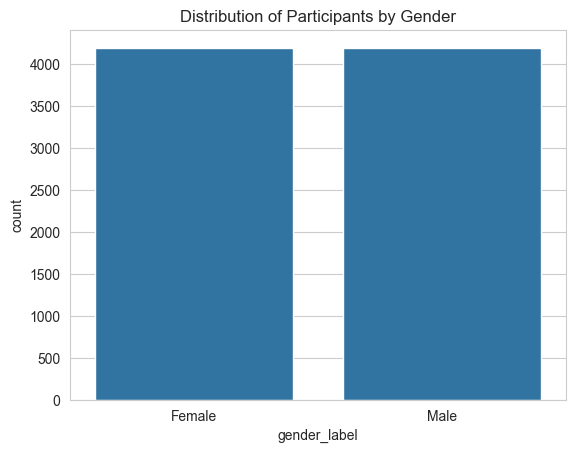

In [11]:
tinder_df['gender_label'] = tinder_df['gender'].map({0: 'Female', 1: 'Male'})


sns.countplot(x='gender_label', data=tinder_df)
plt.title("Distribution of Participants by Gender")
plt.show()

#### Interpretation

Both male and female participants are represented in the dataset, which allows us to compare second-date decisions across genders.

## Age Distributions

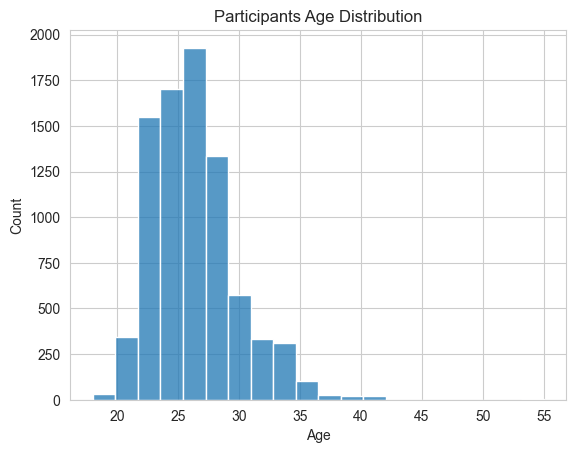

In [12]:
sns.histplot(tinder_df['age'], bins=20)
plt.title("Participants Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

#### Intrepretation

Most participants are in their mid‑twenties, with a clear concentration between ages 22 and 30.
This means the dataset mainly reflects dating behaviors of young adults, while older age groups are much less represented.

### Education Level

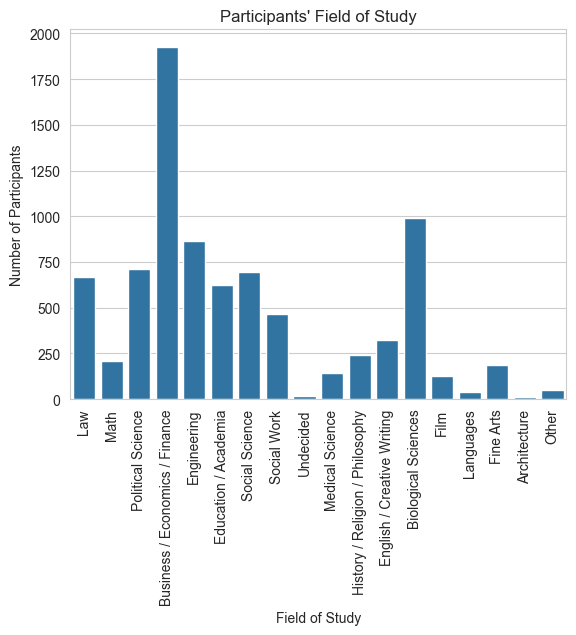

In [13]:
# Mapping field of study codes based on official dataset documentation

FIELD_MAPPING = {
    1: 'Law',
    2: 'Math',
    3: 'Social Science',
    4: 'Medical Science',
    5: 'Engineering',
    6: 'English / Creative Writing',
    7: 'History / Religion / Philosophy',
    8: 'Business / Economics / Finance',
    9: 'Education / Academia',
    10: 'Biological Sciences',
    11: 'Social Work',
    12: 'Undecided',
    13: 'Political Science',
    14: 'Film',
    15: 'Fine Arts',
    16: 'Languages',
    17: 'Architecture',
    18: 'Other'
}

tinder_df['field_label'] = tinder_df['field_cd'].map(FIELD_MAPPING)

sns.countplot(x='field_label', data=tinder_df)
plt.title("Participants' Field of Study")
plt.xticks(rotation=90)
plt.xlabel("Field of Study")
plt.ylabel("Number of Participants")
plt.show()

#### Interpretation

Participants report different academic backgrounds,  with some fields 
being more represented than others.

### Career Distribution

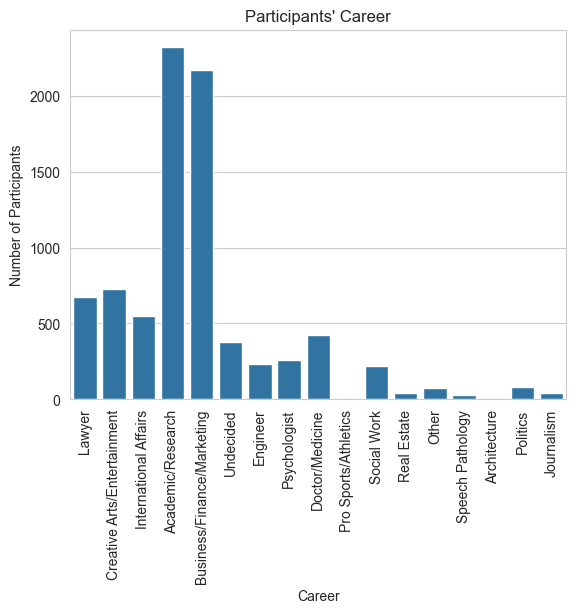

In [14]:
# Mapping career codes based on official dataset documentation

CAREER_MAPPING = {
    1: 'Lawyer',
    2: 'Academic/Research',
    3: 'Psychologist',
    4: 'Doctor/Medicine',
    5: 'Engineer',
    6: 'Creative Arts/Entertainment',
    7: 'Business/Finance/Marketing',
    8: 'Real Estate',
    9: 'International Affairs',
    10: 'Undecided',
    11: 'Social Work',
    12: 'Speech Pathology',
    13: 'Politics',
    14: 'Pro Sports/Athletics',
    15: 'Other',
    16: 'Journalism',
    17: 'Architecture'
}

tinder_df['career_label'] = tinder_df['career_c'].map(CAREER_MAPPING)

sns.countplot(x='career_label', data=tinder_df)
plt.title("Participants' Career")
plt.xticks(rotation=90)
plt.xlabel("Career")
plt.ylabel("Number of Participants")
plt.show()

#### Interpretation

Career intentions vary across participants, which may reflect 
differences in long-term lifestyle preferences.

### Racial Background

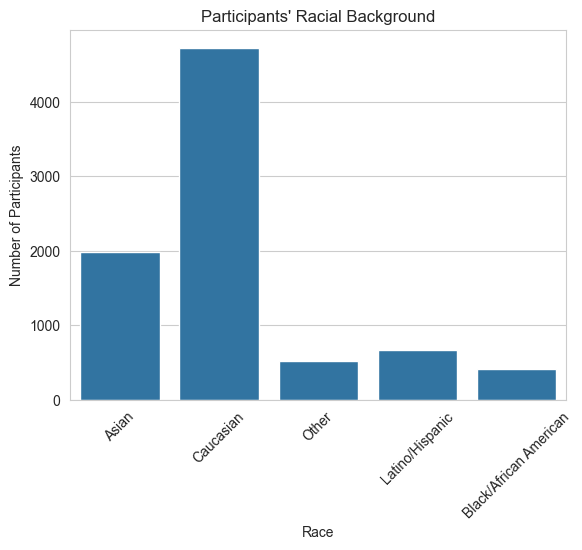

In [15]:
# Mapping race codes based on official dataset documentation

RACE_MAPPING = {
    1: 'Black/African American',
    2: 'Caucasian',
    3: 'Latino/Hispanic',
    4: 'Asian',
    5: 'Native American',
    6: 'Other'
}

tinder_df['race_label'] = tinder_df['race'].map(RACE_MAPPING)

sns.countplot(x='race_label', data=tinder_df)
plt.title("Participants' Racial Background")
plt.xticks(rotation=45)
plt.xlabel("Race")
plt.ylabel("Number of Participants")
plt.show()

#### Interpretation

Participants belong to diverse racial backgrounds.

Understanding this distribution is important when evaluating whether shared interests 
or racial similarity influence the likelihood of agreeing to a second date.

### Match Distribution

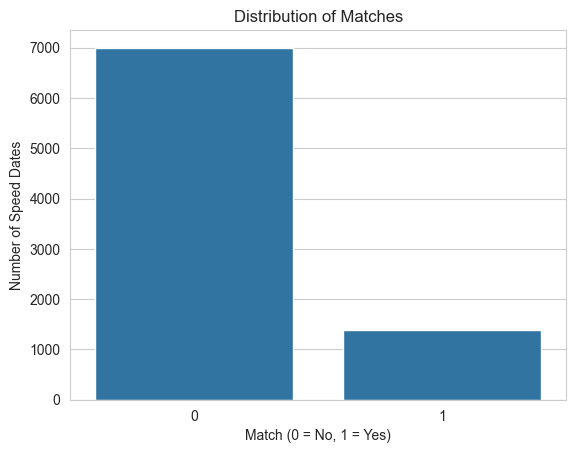

In [16]:
sns.countplot(x='match', data=tinder_df)
plt.title("Distribution of Matches")
plt.xlabel("Match (0 = No, 1 = Yes)")
plt.ylabel("Number of Speed Dates")
plt.show()

#### Interpretation

Most speed-dating interactions did not lead to a mutual match.

## Data Quality Audit

In [17]:
missing_values = tinder_df.isnull().sum()/len(tinder_df)*100
missing_values.sort_values(ascending=False).head(15)

num_in_3    92.026737
numdat_3    82.143710
expnum      78.515159
sinc7_2     76.665075
amb7_2      76.665075
shar7_2     76.438291
intel7_2    76.318931
attr7_2     76.318931
fun7_2      76.318931
shar7_3     75.936978
amb7_3      75.936978
amb5_3      75.936978
fun5_3      75.936978
intel5_3    75.936978
sinc5_3     75.936978
dtype: float64

#### Interpretation

Several variables contain a high proportion of missing values, in some cases 
exceeding 70% of observations.

Using them without prior handling could lead to biased statistical 
analysis and unreliable visualizations, as results would be based on a reduced 
subset of the original sample.

## Analytical Dataset Construction

In [18]:
analysis_columns = [
    'dec',
    'attr','sinc','intel','fun','amb','shar',
    'samerace','order'
]

tinder_analysis_df = tinder_df[analysis_columns].dropna()

tinder_analysis_df['decision_label'] = tinder_analysis_df['dec'].map({
    0: 'No Second Date',
    1: 'Second Date'
})

## Bivariate Analysis

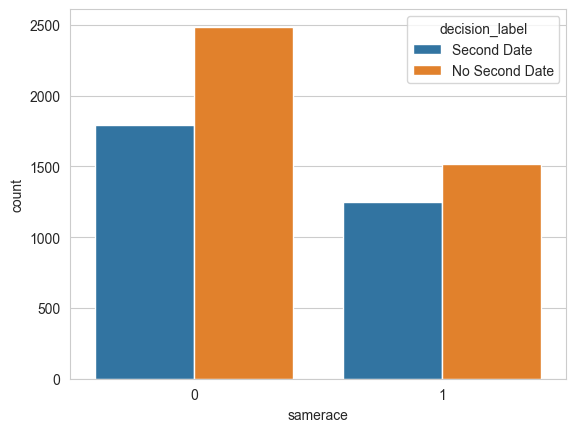

In [19]:
sns.countplot(x='samerace', hue='decision_label', data=tinder_analysis_df)
plt.show()

#### Interpretation

Participants with the same racial background do not seem more likely to agree to a second date.

This suggests that racial similarity may be less influential than perceived personal compatibility during short interactions.

### Shared Interests

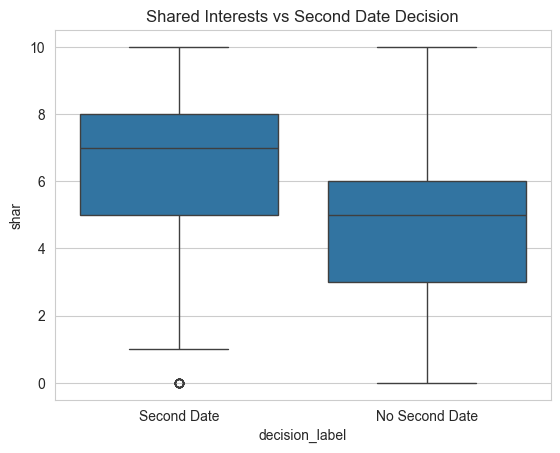

In [20]:
sns.boxplot(x='decision_label', y='shar',
            data=tinder_analysis_df)
plt.title("Shared Interests vs Second Date Decision")
plt.show()

#### Interpretation

Participants who reported higher levels of shared interests with their partner
were significantly more likely to agree to a second date.

This suggests that perceived lifestyle compatibility plays a key role in
initial romantic attraction, even during short interactions.

From a product perspective, this highlights the importance of allowing users
to express and match based on hobbies or interests, as these compatibility
signals may directly increase the likelihood of mutual matches.

### Meeting Order

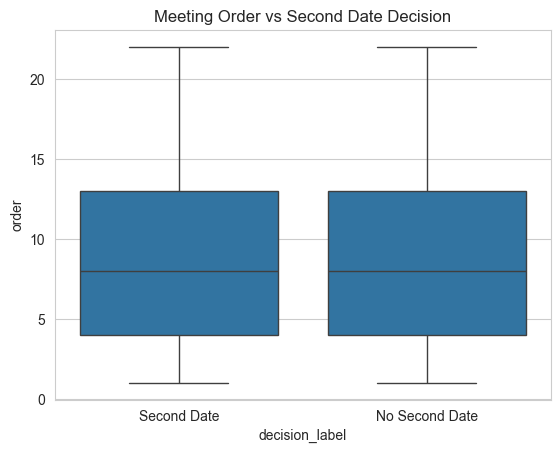

In [21]:
sns.boxplot(x='decision_label', y='order',
            data=tinder_analysis_df)
plt.title("Meeting Order vs Second Date Decision")
plt.show()

#### Interpretation

The order in which participants met their partners during the event does not
appear to significantly influence the likelihood of agreeing to a second date.

This suggests that decision fatigue or comparison effects across multiple
interactions do not materially affect romantic interest during short encounters.

For Tinder, this implies that user exposure timing within the platform is
unlikely to bias match outcomes in a meaningful way.

### Attractiveness

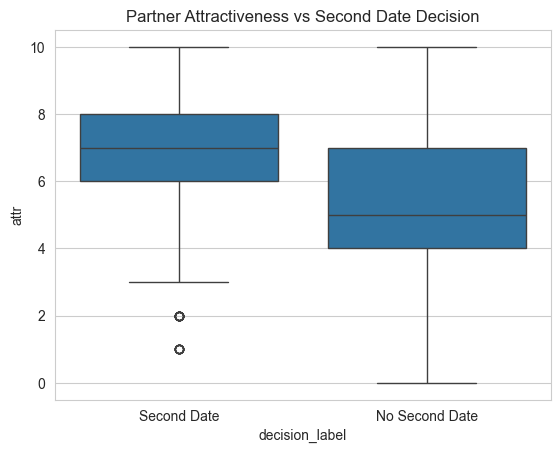

In [22]:
sns.boxplot(x='decision_label', y='attr',
            data=tinder_analysis_df)
plt.title("Partner Attractiveness vs Second Date Decision")
plt.show()

#### Interpretation

Participants who agreed to a second date consistently rated their partner
as more attractive compared to those who declined further interaction.

This confirms that perceived physical attractiveness remains one of the
strongest drivers of early romantic interest.

In the context of online dating platforms, this emphasizes the importance
of visual presentation, as profile photos may significantly impact the
probability of match formation.

### Fun

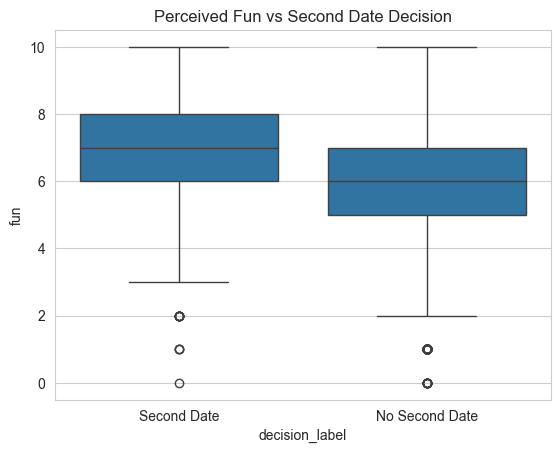

In [23]:
sns.boxplot(x='decision_label', y='fun',
            data=tinder_analysis_df)
plt.title("Perceived Fun vs Second Date Decision")
plt.show()

#### Interpretation

Higher perceived levels of fun during the interaction are associated with
a greater likelihood of agreeing to a second date.

This indicates that emotional engagement during initial encounters plays
a meaningful role in romantic decision-making.

Encouraging user profiles that reflect personality and interests may help
foster more engaging interactions and improve match success rates.

### Intelligence

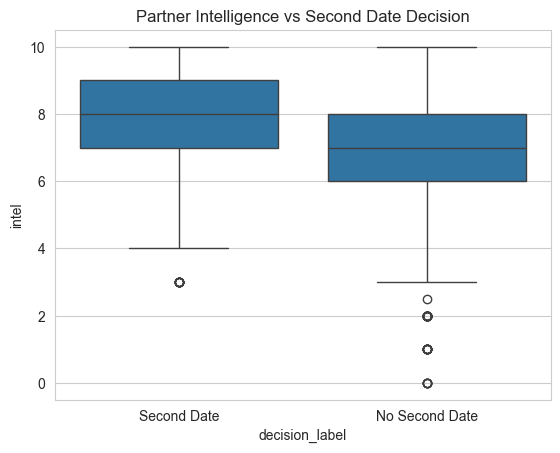

In [24]:
sns.boxplot(x='decision_label', y='intel',
            data=tinder_analysis_df)
plt.title("Partner Intelligence vs Second Date Decision")
plt.show()

#### Interpretation

Participants who perceived their partner as more intelligent were more
likely to express interest in a second date.

This suggests that cognitive compatibility may contribute to attraction,
although its influence appears secondary to more immediate emotional
factors such as attractiveness or perceived fun.

### Ambition

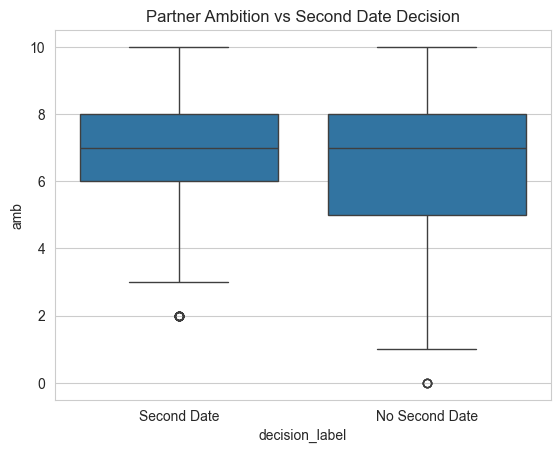

In [25]:
sns.boxplot(x='decision_label', y='amb',
            data=tinder_analysis_df)
plt.title("Partner Ambition vs Second Date Decision")
plt.show()

#### Interpretation

Perceived ambition does not appear to strongly differentiate interactions
that resulted in a second date from those that did not.

This may indicate that long-term personality traits are less influential
during brief first encounters, where immediate compatibility cues are
likely to dominate decision-making.

### Sincerity

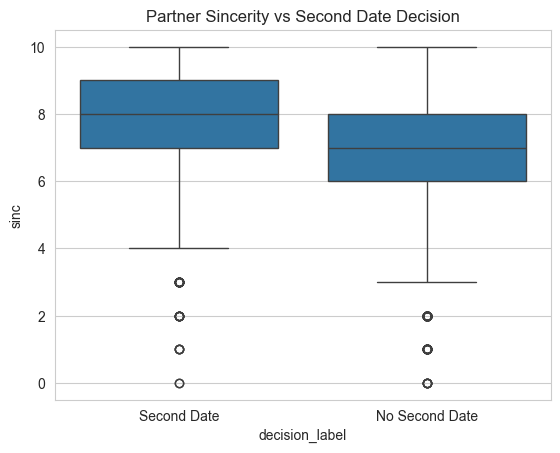

In [26]:
sns.boxplot(x='decision_label', y='sinc',
            data=tinder_analysis_df)
plt.title("Partner Sincerity vs Second Date Decision")
plt.show()

#### Interpretation

Perceived sincerity shows limited variation between interactions that led
to a second date and those that did not.

This suggests that authenticity may be difficult to accurately assess
during short initial meetings and therefore has a weaker impact on early
romantic decisions.

## Multivariate Predictive Analysis – Logistic Regression

In [27]:
X = tinder_analysis_df[['attr','sinc','intel','fun','amb','shar','samerace','order']]
y = tinder_analysis_df['dec']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = LogisticRegression()
model.fit(X_scaled, y)

impact_df = pd.DataFrame({
    "Variable": X.columns,
    "Impact on Second Date Decision": model.coef_[0]
}).sort_values(by="Impact on Second Date Decision", ascending=False)

impact_df

,Variable,Impact on Second Date Decision
0,attr,1.069911
5,shar,0.580732
3,fun,0.518267
2,intel,0.043336
6,samerace,-0.007806
7,order,-0.053239
1,sinc,-0.201695
4,amb,-0.301196


#### Interpretation

This logistic regression model evaluates the combined effect of multiple
partner characteristics on the likelihood of agreeing to a second date.

When controlling for all other perceived traits, attractiveness, shared
interests, and fun emerge as the strongest independent predictors of
romantic interest.

This multivariate analysis reflects a more realistic decision-making
process and provides actionable insights for matching algorithms by
identifying which user attributes most strongly influence engagement.

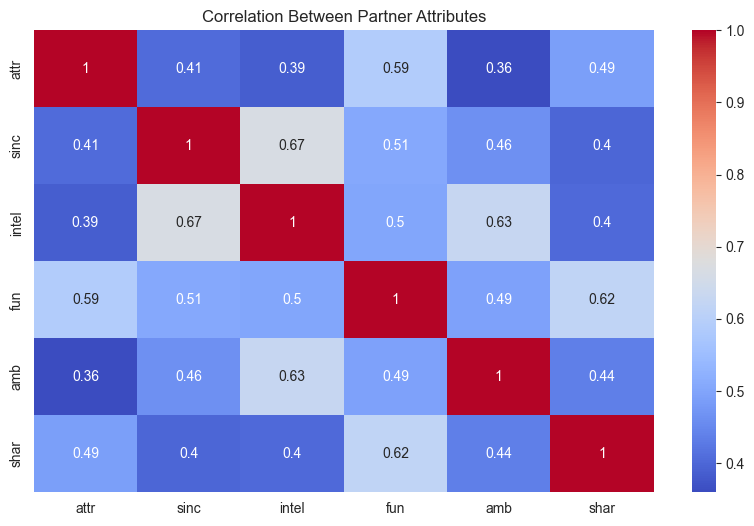

In [28]:
ATTRIBUTES = ['attr', 'sinc', 'intel', 'fun', 'amb', 'shar']

plt.figure(figsize=(10,6))
sns.heatmap(tinder_analysis_df[ATTRIBUTES].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Partner Attributes")
plt.show()

#### Interpretation

Some partner ratings are moderately related.

For instance, sincerity and intelligence tend to be rated similarly,
while fun is often associated with attractiveness and shared interests.

This suggests that participants who perceive one positive trait in
their partner are more likely to rate other traits positively as well.

## Inferential Analysis

In order to assess whether the observed differences between interactions that led to a second date and those that did not are statistically significant, inferential statistical tests were conducted.

### Attractiveness vs Second Date (t-test)

In [29]:
from scipy.stats import ttest_ind

second_date = tinder_analysis_df[tinder_analysis_df["dec"] == 1]
no_second_date = tinder_analysis_df[tinder_analysis_df["dec"] == 0]

stat, p = ttest_ind(
    second_date['attr'],
    no_second_date['attr'],
    equal_var=False
)

print(f"Attractiveness p-value = {p:.5f}")

Attractiveness p-value = 0.00000


#### Interpretation

The t-test shows that attractiveness ratings are significantly higher in interactions that led to a second date (p < 0.001).

This suggests that perceived physical attractiveness has a real impact on the decision to pursue further interaction, even during brief encounters.

From a product perspective, this highlights the importance of profile photos, as visual appeal may strongly influence the likelihood of mutual matches.

### Shared Interests vs Second Date

In [30]:
stat, p = ttest_ind(
    second_date['shar'],
    no_second_date['shar'],
    equal_var=False
)

print(f"Shared Interests p-value = {p:.5f}")

Shared Interests p-value = 0.00000


The t-test shows that shared interest ratings are significantly higher in interactions that led to a second date (p < 0.001).

This suggests that perceived compatibility plays an important role in early romantic decision-making.

From a product perspective, this insight supports the integration of interest-based matching features to improve the likelihood of mutual matches.

### Same Race vs Second Date (Chi-square)

In [31]:
from scipy.stats import chi2_contingency

table = pd.crosstab(
    tinder_analysis_df['samerace'],
    tinder_analysis_df['dec']
)

chi2, p, dof, expected = chi2_contingency(table)

print(f"Same race p-value = {p:.5f}")

Same race p-value = 0.00906


#### Interpretation

The Chi-square test indicates a statistically significant association between sharing the same racial background and agreeing to a second date (p < 0.05).

This suggests that demographic similarity may have some influence on early romantic decisions, although its impact appears to be weaker compared to perceived compatibility factors such as attractiveness or shared interests.

### Meeting Order 

In [32]:
stat, p = ttest_ind(
    second_date['order'],
    no_second_date['order'],
    equal_var=False
)

print(f"Order p-value = {p:.5f}")

Order p-value = 0.16076


#### Interpretation

The t-test indicates no statistically significant difference in meeting order between interactions that led to a second date and those that did not (p > 0.05).

This suggests that the position of the interaction during the event does not have a measurable impact on the decision to pursue a second date, and that any observed differences may be due to random variation

## Conclusion

This analysis indicates that perceived attractiveness, shared interests,
and emotional engagement are the primary drivers of early romantic
interest in short interactions.

Multivariate modelling confirms that these attributes remain significant
predictors of second-date decisions even when controlling for demographic
similarity or interaction order.

These findings provide actionable insights for Tinder’s matching strategy,
suggesting that compatibility signals and engaging user profiles may have
a greater impact on match formation than demographic similarity alone.